# hepatitis adsgan stacking

Training on hepatitis dataset using adsgan model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hepatitis data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()
gen_method = "adsgan"
target = "Baselinehistological staging"


In [3]:
# Split hepatitis data into 80/20 train and test
data_train, data_test = train_test_split(data_real, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv("Data\HCV_train.csv", index=False)
data_test.to_csv("Data\HCV_test.csv", index=False)


In [3]:
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v1.csv", key="synth")

[2024-05-16T08:42:30.995786+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 13%|█▎        | 1299/10000 [10:11<1:08:14,  2.13it/s]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       35       2   35      2               2          2          2   
1       57       2   24      2               2          1          1   
2       55       1   30      2               2          1          2   
3       61       2   23      2               2          1          2   
4       57       1   29      1               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
1103    61       2   22      2               1          1          1   
1104    42       2   32      2               1          1          2   
1105    42       1   28      2               2          2          1   
1106    52       2   28      2               2          2          1   
1107    51       1   35      2               1          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    1          

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v1.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v2.csv", key="synth")

[2024-05-16T08:52:47.496499+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


  7%|▋         | 699/10000 [18:28<4:05:46,  1.59s/it] 


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
315     37       1   35      2               1          1          1   
1869    42       1   33      2               2          1          2   
1576    47       2   31      1               1          1          2   
1336    35       2   35      2               1          1          1   
655     37       2   31      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
1638    58       1   34      2               1          2          1   
1095    61       2   22      2               1          1          1   
1130    42       2   32      2               1          1          2   
1294    42       1   28      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
315                                  2          

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v2.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v3.csv", key="synth")

[2024-05-16T09:11:20.196490+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▌         | 549/10000 [36:47<10:33:28,  4.02s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
4194    47       2   30      1               1          1          1   
2389    58       2   33      2               1          2          2   
2561    49       2   28      1               1          1          1   
5344    41       2   32      1               1          2          1   
3690    57       1   24      2               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
3772    37       2   22      1               2          1          2   
5191    53       2   23      2               1          1          2   
5226    35       2   28      1               2          1          1   
5390    50       2   23      1               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
4194                                 2          

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v3.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v4.csv", key="synth")

[2024-05-16T09:48:13.858627+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  4%|▍         | 399/10000 [48:52<19:36:14,  7.35s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
9729    59       2   22      1               2          1          1   
4720    50       1   29      1               1          1          2   
474     41       1   31      2               1          1          2   
4874    36       2   33      1               1          2          1   
2391    33       2   22      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
5734    32       1   28      1               2          1          1   
5191    53       2   23      2               1          1          2   
5390    50       2   23      1               2          2          1   
860     52       2   28      2               2          2          1   
7270    42       1   33      2               1          1          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
9729                                 1          

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v4.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v5.csv", key="synth")

[2024-05-16T10:37:15.984861+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  3%|▎         | 299/10000 [1:29:09<48:12:50, 17.89s/it]


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
8704     58       2   32      1               1          2          1   
558      34       1   25      1               2          1          1   
6959     39       1   23      2               1          1          1   
20195    58       2   28      2               2          2          1   
20145    50       2   27      2               2          1          1   
...     ...     ...  ...    ...             ...        ...        ...   
11964    47       1   22      2               1          1          1   
21575    55       1   32      2               1          2          2   
5390     50       2   23      1               2          2          1   
860      52       2   28      2               2          2          1   
15795    38       1   24      1               1          2          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
8704                               

# stack_synth_only

In [13]:
# Remove the first 1385 rows, equal to the number of real data, from stack_v4
data_stack_synth_only = data_stack.iloc[1385:, :]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\HCV_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_synth_only_test.csv", index=False)

# syn_synth_only

In [14]:
# Synthesize data
gen_count = data_stack_synth_only.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_synth_only_syn_.csv", key="synth")

[2024-05-16T12:06:48.849332+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▍         | 499/10000 [2:22:57<45:21:53, 17.19s/it]


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
7889     57       2   32      2               2          1          2   
11634    48       2   27      1               2          1          1   
20750    49       1   31      2               2          1          2   
3329     41       1   33      2               1          1          1   
18793    57       1   29      1               2          2          1   
...     ...     ...  ...    ...             ...        ...        ...   
12669    59       2   23      2               1          1          2   
13349    43       1   30      2               1          2          2   
6775     34       1   32      2               2          1          2   
2245     56       2   35      1               2          2          2   
17180    54       2   33      2               1          1          1   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
7889                               

# Eval on syn_v1

In [15]:
# Read train and test from real data
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# Count of real_data
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016619,0.002589,0.983381,0.002589
1,pca_eigval_diff,u,0.010651,NaN,0.989349,NaN
2,pca_eigvec_ang,u,0.396921,NaN,0.873656,NaN
3,avg_cio,u,0.272459,0.079471,0.272459,0.079471
4,corr_mat_diff,u,0.817703,NaN,0.997986,NaN
5,mutual_inf_diff,u,1.512391,NaN,0.996275,NaN
6,ks_tvd_stat,u,0.057137,0.007173,0.942863,0.007173
7,frac_ks_sigs,u,0.448276,NaN,0.551724,NaN
8,avg_h_dist,u,0.006092,0.001832,0.993908,0.001832
9,avg_pMSE,u,0.009743,0.000209,0.961029,0.000837


# Eval on syn_v2

In [16]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v2_sample.csv", index=False)

In [17]:
# Read syn_v2_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016707,0.002590,0.983293,0.002590
1,pca_eigval_diff,u,0.003611,NaN,0.996389,NaN
2,pca_eigvec_ang,u,0.370852,NaN,0.881954,NaN
3,avg_cio,u,0.302070,0.073223,0.302070,0.073223
4,corr_mat_diff,u,0.793261,NaN,0.998046,NaN
5,mutual_inf_diff,u,1.533036,NaN,0.996224,NaN
6,ks_tvd_stat,u,0.066452,0.007672,0.933548,0.007672
7,frac_ks_sigs,u,0.689655,NaN,0.310345,NaN
8,avg_h_dist,u,0.008266,0.002656,0.991734,0.002656
9,avg_pMSE,u,0.010301,0.000674,0.958795,0.002697


# Eval on syn_v3

In [18]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v3_sample.csv", index=False)

In [19]:
# Read syn_v3_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.042339,0.002592,0.957661,0.002592
1,pca_eigval_diff,u,0.005001,NaN,0.994999,NaN
2,pca_eigvec_ang,u,0.333583,NaN,0.893817,NaN
3,avg_cio,u,0.100578,0.043709,0.100578,0.043709
4,corr_mat_diff,u,0.836050,NaN,0.997941,NaN
5,mutual_inf_diff,u,1.619843,NaN,0.996010,NaN
6,ks_tvd_stat,u,0.091543,0.011418,0.908457,0.011418
7,frac_ks_sigs,u,0.724138,NaN,0.275862,NaN
8,avg_h_dist,u,0.010313,0.003157,0.989687,0.003157
9,avg_pMSE,u,0.037153,0.000856,0.851388,0.003424


# Eval on syn_v4

In [20]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v4_sample.csv", index=False)

In [21]:
# Read syn_v4_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.036421,0.002603,0.963579,0.002603
1,pca_eigval_diff,u,0.013046,NaN,0.986954,NaN
2,pca_eigvec_ang,u,0.372808,NaN,0.881332,NaN
3,avg_cio,u,0.173616,0.065584,0.173616,0.065584
4,corr_mat_diff,u,0.852500,NaN,0.997900,NaN
5,mutual_inf_diff,u,1.575241,NaN,0.996120,NaN
6,ks_tvd_stat,u,0.080524,0.009159,0.919476,0.009159
7,frac_ks_sigs,u,0.758621,NaN,0.241379,NaN
8,avg_h_dist,u,0.008743,0.002649,0.991257,0.002649
9,avg_pMSE,u,0.032485,0.001403,0.870062,0.005611


# Eval on syn_v5

In [22]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v5_sample.csv", index=False)

In [23]:
# Read syn_v5_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.057005,0.002593,0.942995,0.002593
1,pca_eigval_diff,u,0.019159,NaN,0.980841,NaN
2,pca_eigvec_ang,u,0.341730,NaN,0.891224,NaN
3,avg_cio,u,0.053780,0.037811,0.053780,0.037811
4,corr_mat_diff,u,0.841574,NaN,0.997927,NaN
5,mutual_inf_diff,u,1.650593,NaN,0.995935,NaN
6,ks_tvd_stat,u,0.117793,0.011320,0.882207,0.011320
7,frac_ks_sigs,u,0.931034,NaN,0.068966,NaN
8,avg_h_dist,u,0.016164,0.004901,0.983836,0.004901
9,avg_pMSE,u,0.066212,0.001334,0.735152,0.005336


# Eval on synth_only_stack

In [24]:
# Read synth_only_syn data
syn_sample = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv", index=False)

In [25]:
# Read synth_only_syn_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.049215,0.002599,0.950785,0.002599
1,pca_eigval_diff,u,0.026027,NaN,0.973973,NaN
2,pca_eigvec_ang,u,0.377154,NaN,0.879948,NaN
3,avg_cio,u,0.233731,0.084953,0.233731,0.084953
4,corr_mat_diff,u,0.888608,NaN,0.997811,NaN
5,mutual_inf_diff,u,1.621518,NaN,0.996006,NaN
6,ks_tvd_stat,u,0.102954,0.012309,0.897046,0.012309
7,frac_ks_sigs,u,0.793103,NaN,0.206897,NaN
8,avg_h_dist,u,0.011702,0.004783,0.988298,0.004783
9,avg_pMSE,u,0.059807,0.000608,0.760772,0.002433


# Multiple plots for evaluation comparisons

In [26]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [27]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_synth_only"]

In [28]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate,mia_cls_risk
res_real,0.496390,0.219744,0.0,0.997122
res_stack_v1,0.404332,0.218300,0.0,0.946763
res_stack_v2,0.444946,0.215212,0.0,0.733813
res_stack_v3,0.462094,0.212673,0.0,0.943885
res_stack_v4,0.292419,0.209187,0.0,0.653237
res_stack_synth_only,0.447653,0.213046,0.0,0.812950


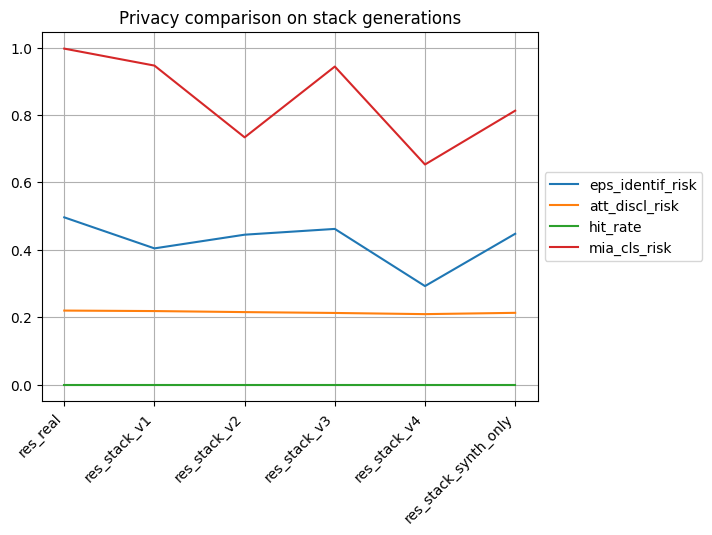

In [29]:
privacy_plot.plot.line()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [30]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

DCR_plot

,median_DCR
res_real,0.989768
res_stack_v1,1.020707
res_stack_v2,1.014235
res_stack_v3,1.019252
res_stack_v4,1.035520
res_stack_synth_only,1.022881


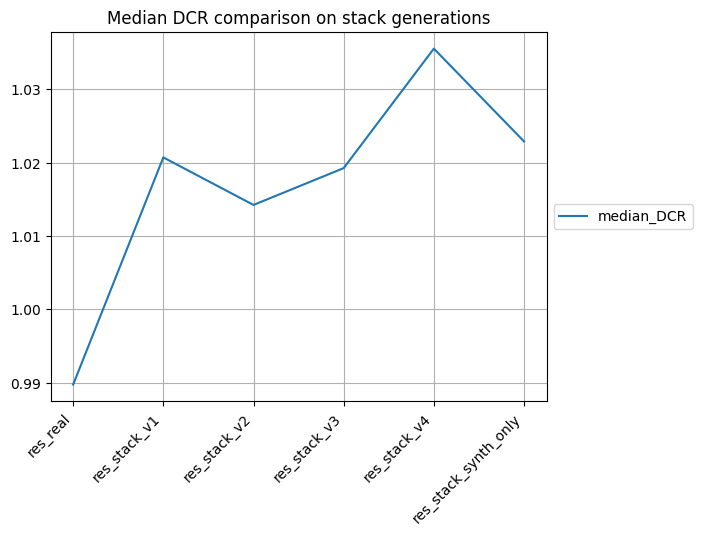

In [31]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [32]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.016619,0.010651,0.396921
res_stack_v1,0.016707,0.003611,0.370852
res_stack_v2,0.042339,0.005001,0.333583
res_stack_v3,0.036421,0.013046,0.372808
res_stack_v4,0.057005,0.019159,0.341730
res_stack_synth_only,0.049215,0.026027,0.377154


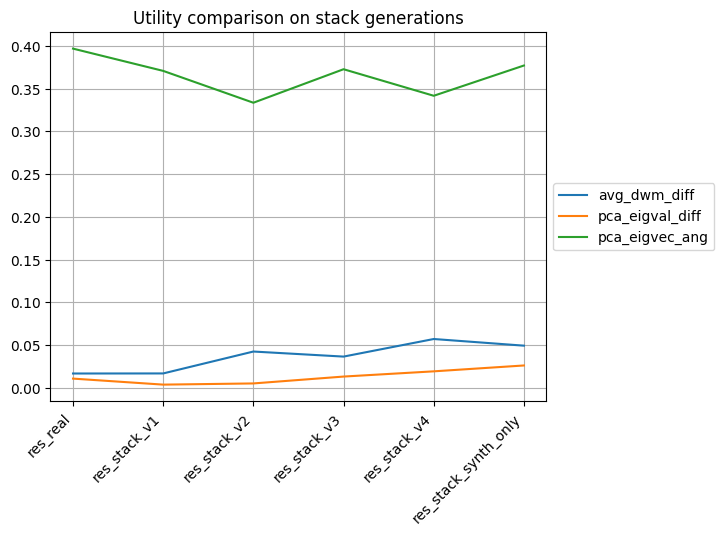

In [33]:
utility_plot.plot.line()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [34]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.817703,1.512391
res_stack_v1,0.793261,1.533036
res_stack_v2,0.836050,1.619843
res_stack_v3,0.852500,1.575241
res_stack_v4,0.841574,1.650593
res_stack_synth_only,0.888608,1.621518


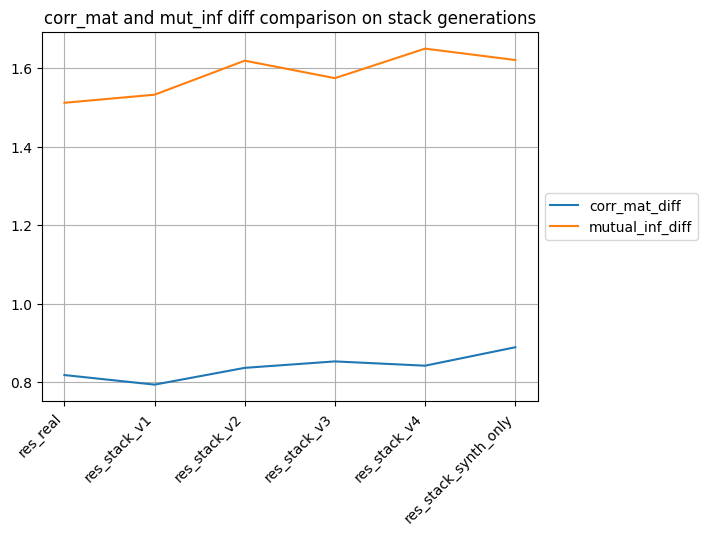

In [35]:
matrix_diff_plot.plot.line()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [36]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.016619,0.010651,0.396921,0.272459,0.817703,1.512391,0.057137,0.448276,0.006092,0.009743,0.927906,-0.005173,0.525632,0.075993,0.036793,0.025271,0.0,0.496390,0.997122,0.219744
res_stack_v1,0.016707,0.003611,0.370852,0.302070,0.793261,1.533036,0.066452,0.689655,0.008266,0.010301,0.924324,-0.000056,0.570217,0.013899,0.027767,0.031588,0.0,0.404332,0.946763,0.218300
res_stack_v2,0.042339,0.005001,0.333583,0.100578,0.836050,1.619843,0.091543,0.724138,0.010313,0.037153,0.923850,-0.002052,0.550271,0.047984,0.030938,0.027978,0.0,0.444946,0.733813,0.215212
res_stack_v3,0.036421,0.013046,0.372808,0.173616,0.852500,1.575241,0.080524,0.758621,0.008743,0.032485,0.926331,0.000379,0.565343,0.028881,0.028403,0.039711,0.0,0.462094,0.943885,0.212673
res_stack_v4,0.057005,0.019159,0.341730,0.053780,0.841574,1.650593,0.117793,0.931034,0.016164,0.066212,0.927435,-0.004257,0.602437,-0.013688,0.016227,0.049639,0.0,0.292419,0.653237,0.209187
res_stack_synth_only,0.049215,0.026027,0.377154,0.233731,0.888608,1.621518,0.102954,0.793103,0.011702,0.059807,0.924848,0.004925,0.562906,0.055084,0.020098,0.040614,0.0,0.447653,0.812950,0.213046


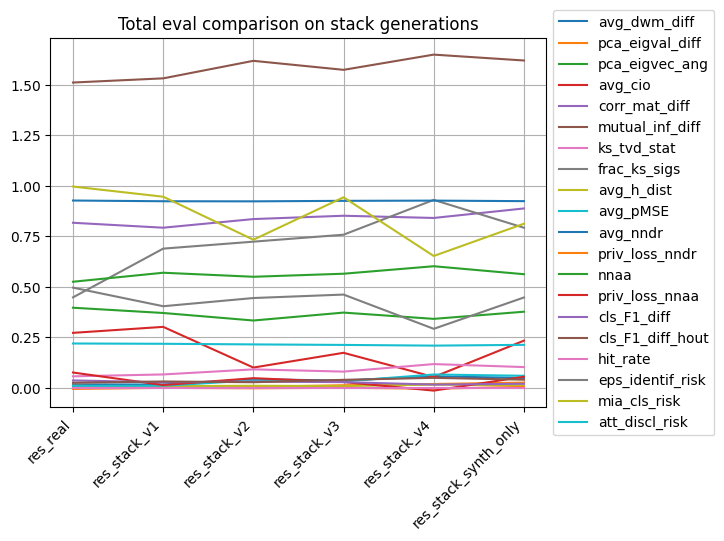

In [37]:
total_eval.plot.line()
plt.title("Total eval comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [38]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.844226,0.736344
1,res_stack_v1,0.824833,0.763891
2,res_stack_v2,0.796709,0.780919
3,res_stack_v3,0.799094,0.755998
4,res_stack_v4,0.758812,0.816345
5,res_stack_synth_only,0.789358,0.770278


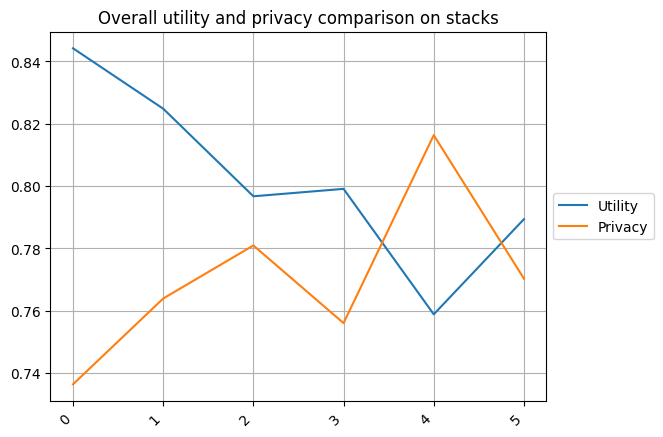

In [39]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()